In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import re

In [2]:
from pathlib import Path

def root_path() -> Path:
    return Path(os.path.abspath('')).parent.parent.parent 

In [3]:
PATH_DATA = os.path.join(root_path(), 'data\\Clustering')

In [4]:
name:str = PATH_DATA + "\\Специальности.csv"
data = pd.read_csv(name, sep=";")

data

scientific_area = data.iloc[:, 0].replace(".?[а-яА-Я  ]", "", regex=True).replace("\.", "", regex=True).astype(float)
specialty_groups = data.iloc[:, 1].replace(".?[а-яА-Я  ]", "", regex=True).astype(float)
df = pd.DataFrame({"name": data.iloc[:, 2], "area": scientific_area, "groups": specialty_groups})
specialty_groups

vector = [[scientific_area[i], specialty_groups[i]] for i, v in enumerate(scientific_area)]
k_means = KMeans(n_clusters=5)
k_means.fit(vector)
all_predictions = k_means.predict(vector)
all_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [5]:
df['km_clus'] = all_predictions
df

,name,area,groups,km_clus
0,"1.1.1. Вещественный, комплексный и функциональ...",1.0,1.10,1
1,1.1.2. Дифференциальные уравнения и математиче...,1.0,1.10,1
2,1.1.3. Геометрия и топология,1.0,1.10,1
3,1.1.4. Теория вероятностей и математическая ст...,1.0,1.10,1
4,"1.1.5. Математическая логика, алгебра, теория ...",1.0,1.10,1
...,...,...,...,...
346,5.11.3. Практическая теология (по исследовател...,5.0,5.11,2
347,5.12.1. Междисциплинарные исследования когнити...,5.0,5.12,2
348,5.12.2. Междисциплинарные исследования мозга,5.0,5.12,2
349,5.12.3. Междисциплинарные исследования языка,5.0,5.12,2


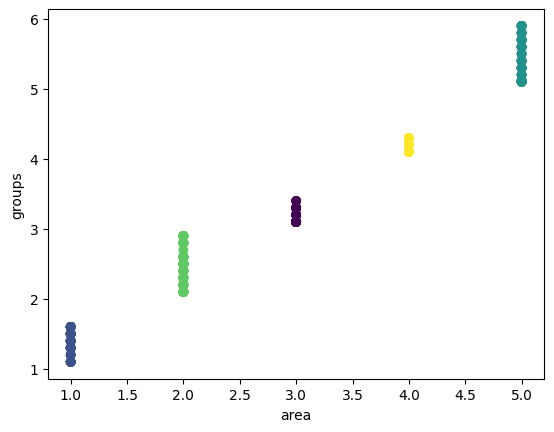

In [6]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 2],  c=all_predictions.astype(float))
plt.xlabel("area")
plt.ylabel("groups")
plt.show()